In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Downloads/module_5_starter_code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Downloads/module_5_starter_code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])
merged_data.head()

# Display the data table for preview
organized_merged_data=merged_data[["Mouse ID", "Timepoint", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Tumor Volume (mm3)", "Metastatic Sites"]]
organized_merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [8]:
# Checking the number of mice.
unique_mice=organized_merged_data['Mouse ID'].unique()
no_unique_mice=len(unique_mice)
print(f"There are {no_unique_mice} unique mice in the dataset.")

There are 249 unique mice in the dataset.


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
organized_merged_data.duplicated()
#new_df=organized_merged_data.drop_duplicates(inplace=True)
#new_df.head()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates_gone=organized_merged_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
len(duplicates_gone['Mouse ID'].unique())
duplicates_gone

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
print(len(duplicates_gone['Mouse ID'].unique()))

249


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

list_drugs=duplicates_gone['Drug Regimen'].tolist()
list_drugs

index_tum_drug=duplicates_gone.set_index('Drug Regimen')['Tumor Volume (mm3)']
tum_drug_grouped=index_tum_drug.groupby('Drug Regimen')
tum_drug_grouped.mean()


median_tum_drug=tum_drug_grouped.median()
median_tum_drug

var_tum_drug=tum_drug_grouped.var()
var_tum_drug

std_tum_drug=tum_drug_grouped.std()
std_tum_drug

sem_tum_drug=tum_drug_grouped.sem()
sem_tum_drug

# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame({
    "Mean Tumor Volume (mm3)": tum_drug_grouped.mean(),
    "Median Tumor Volume (mm3)": median_tum_drug,
    "Variance Tumor Volume (mm3)": var_tum_drug,
    "Standard Deviation Total Volume (mm3)": std_tum_drug,
    "Standard Error of the Mean Total Volume (mm3)": sem_tum_drug
})

summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Total Volume (mm3),Standard Error of the Mean Total Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

agg_sum_df=tum_drug_grouped.agg(['mean','median','var','std','sem'])
agg_sum_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


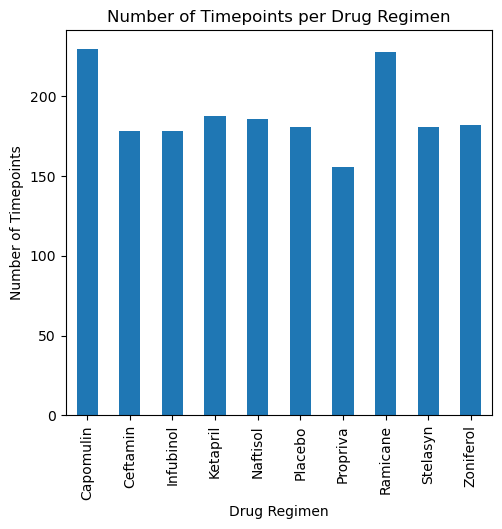

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_tp=duplicates_gone.groupby('Drug Regimen')
drug_tp

timepoint_count=drug_tp['Timepoint'].count()
timepoint_count

drug_tp_chart=timepoint_count.plot(kind='bar',figsize=(5.5,5))
drug_tp_chart

drug_tp_chart.set_xlabel("Drug Regimen")
drug_tp_chart.set_ylabel("Number of Timepoints")
drug_tp_chart.set_title("Number of Timepoints per Drug Regimen")


plt.show()

Text(0, 0.5, 'Number of Timepoints')

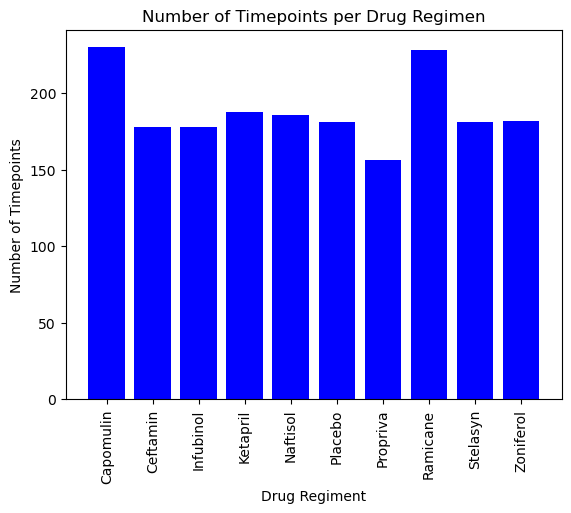

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
sorted=duplicates_gone['Drug Regimen']
sorted_alpha=sorted.sort_values()
sorted_alpha_unique=sorted_alpha.unique()
sorted_alpha_unique

x_axis=sorted_alpha_unique
y_axis=timepoint_count

plt.bar(x_axis,y_axis,color='b')
plt.xticks(rotation=90)

plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Timepoints")

Text(0, 0.5, 'Sex')

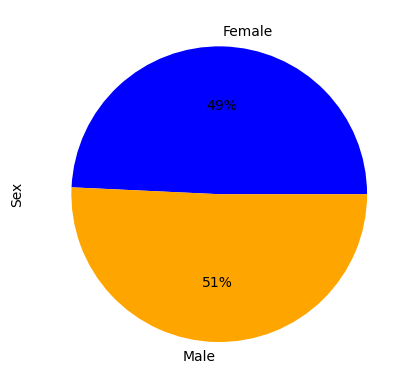

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped_sex=duplicates_gone.groupby('Sex')
grouped_sex

grouped_sex_count=grouped_sex['Mouse ID'].count()
grouped_sex_count

grouped_sex_count_chart=grouped_sex_count.plot(kind='pie',autopct="%1.0f%%",colors=['blue','orange'])
grouped_sex_count_chart

grouped_sex_count_chart.set_ylabel('Sex')

930
958


Text(0, 0.5, 'Sex')

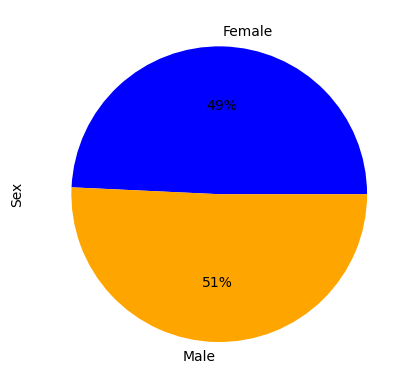

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_mice=duplicates_gone.loc[duplicates_gone['Sex']=='Male']
len(male_mice)

female_mice=duplicates_gone.loc[duplicates_gone['Sex']=='Female']
len(female_mice)

print (len(female_mice))
print (len(male_mice))

sexes=['Female','Male']
counts=[len(female_mice),len(male_mice)]
colors=["blue","orange"]

plt.pie(counts,labels=sexes,colors=colors,autopct="%1.0f%%")
plt.ylabel("Sex")

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

group_time=duplicates_gone.groupby(['Mouse ID'])
max_timepoint_byMouseID=group_time['Timepoint'].max()
pd.DataFrame(max_timepoint_byMouseID)
max_timepoint_byMouseID


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
including_maxtp=pd.merge(duplicates_gone, max_timepoint_byMouseID, how="right", on=["Mouse ID","Timepoint"])
including_maxtp

# Put treatments into a list for for loop (and later for plot labels)
drug_regimens=['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_regimens:

# Locate the rows which contain mice on each drug and get the tumor volumes
    mice_each_drug_tum=including_maxtp.loc[including_maxtp['Drug Regimen']==drug,'Tumor Volume (mm3)']

    tumor_vol.append(mice_each_drug_tum)
    
    
# Determine outliers using upper and lower bounds
    quartiles =mice_each_drug_tum.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The 

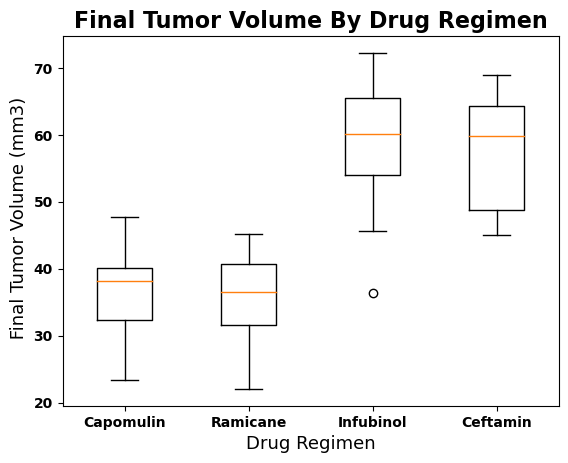

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume By Drug Regimen', fontsize=16, fontweight='bold')
ax1.set_ylabel(' Final Tumor Volume (mm3)',fontsize=13)
ax1.set_xlabel('Drug Regimen',fontsize=13)
ax1.boxplot(tumor_vol)
ax1.set_xticklabels(drug_regimens)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

Text(0, 0.5, 'Timepoint (Days)')

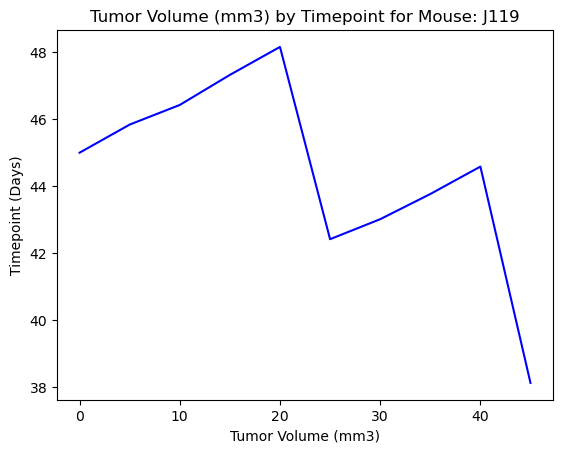

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

duplicates_gone

duplicates_gone['Mouse ID'].unique()
capomulin_mice=duplicates_gone.loc[duplicates_gone['Drug Regimen']=='Capomulin']
list_capomulin_mice=capomulin_mice['Mouse ID'].unique()
list_capomulin_mice


chosen_mouse=capomulin_mice.loc[capomulin_mice['Mouse ID']=='j119']
chosen_mouse


j119_tum_vol=chosen_mouse['Tumor Volume (mm3)']
j119_tum_vol

j119_time_point=chosen_mouse['Timepoint']
j119_time_point

j119_line_plot=plt.plot(j119_time_point,j119_tum_vol,color='blue')
plt.title('Tumor Volume (mm3) by Timepoint for Mouse: J119')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint (Days)')

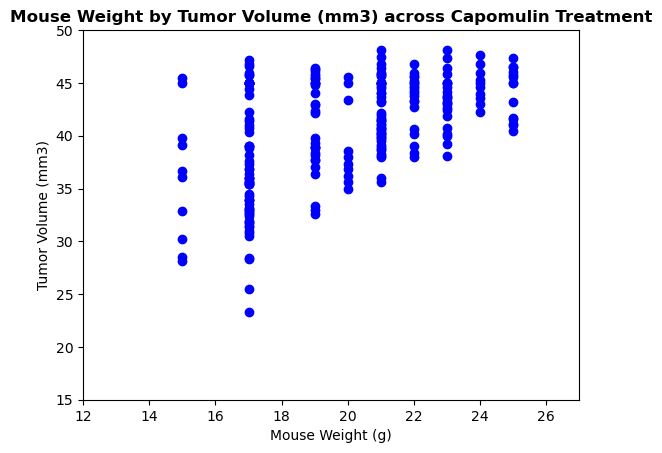

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice=duplicates_gone.loc[duplicates_gone['Drug Regimen']=='Capomulin']
capomulin_mice
tum_vol_cap=capomulin_mice['Tumor Volume (mm3)']
tum_vol_cap

mouse_weight_cap=capomulin_mice['Weight (g)']
mouse_weight_cap

plt.scatter(mouse_weight_cap,tum_vol_cap, marker="o", facecolors='blue')
plt.xlabel('Mouse Weight (g)',color='black')
plt.ylabel('Tumor Volume (mm3)', color='black')
plt.title('Mouse Weight by Tumor Volume (mm3) across Capomulin Treatment', fontweight='bold')
plt.xlim(12,27)
plt.ylim(15,50)
plt.show()

The correlation between Mouse weight (g) and Average Tumor Volume (mm3) is 0.842


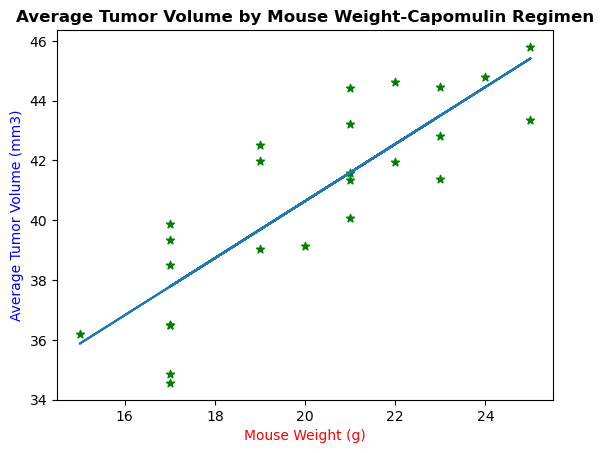

In [35]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capomulin_mice

grouped_cap_mice_avgtumvol=capomulin_mice.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
grouped_cap_mice_avgtumvol
avg_tum_vol_by_mouse_list=grouped_cap_mice_avgtumvol.tolist()
avg_tum_vol_by_mouse_list

grouped_cap_mice_weight=capomulin_mice.groupby(['Mouse ID']).mean()['Weight (g)']
grouped_cap_mice_weight    

correlation2=st.pearsonr(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list)
print(f"The correlation between Mouse weight (g) and Average Tumor Volume (mm3) is {round(correlation2[0],3)}")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list)
vc_fit = vc_slope * grouped_cap_mice_weight + vc_int

plt.scatter(grouped_cap_mice_weight,avg_tum_vol_by_mouse_list, marker="*", facecolors='green')
plt.xlabel('Mouse Weight (g)', color='red',)
plt.ylabel('Average Tumor Volume (mm3)', color='blue')
plt.title('Average Tumor Volume by Mouse Weight-Capomulin Regimen', fontweight='bold')
plt.plot(grouped_cap_mice_weight,vc_fit,"-")
plt.show()